In [2]:
import pandas as pd
import json
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv("C:\\Users\chakri\Downloads\FEEDBACK_DATA_SET.CSV")

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chakri\AppData\Local\Temp\ipykernel_2520\3147719277.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("C:\\Users\chakri\Downloads\FEEDBACK_DATA_SET.CSV")


Step 2:Data Cleaning

In [4]:
# Data Cleaning Function
def clean_comment(comment):
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)  # Remove URLs
    comment = re.sub(r'\@\w+|\#', '', comment)  # Remove @ mentions and # tags
    comment = re.sub(r'[^a-zA-Z0-9\s]', '', comment)  # Remove special characters
    comment = comment.lower()  # Convert to lowercase
    return comment

In [5]:
# Clean comments
df['Cleaned_Comment'] = df['Comment'].apply(clean_comment)


In [6]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

Step 3:Sentiment Analysis

In [7]:
# Sentiment Analysis Function
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [8]:
# Perform sentiment analysis
df['Sentiment'] = df['Cleaned_Comment'].apply(get_sentiment)

Step 4:Trend Analysis

In [9]:
trends = df.groupby(['Date', 'FeedbackChannel'])['Rating'].agg(['count', 'mean']).reset_index()
trends.rename(columns={'count': 'Feedback_Count', 'mean': 'Average_Rating'}, inplace=True)


In [10]:
# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()

Step 5:Data Visualization

C:\Users\chakri\AppData\Local\Temp\ipykernel_2520\1604839571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette="coolwarm")


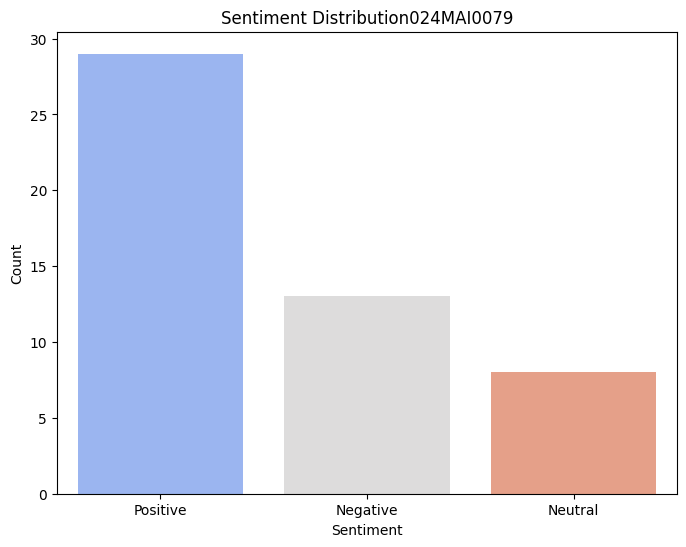

In [17]:
# Sentiment distribution plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette="coolwarm")
plt.title('Sentiment Distribution024MAI0079')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

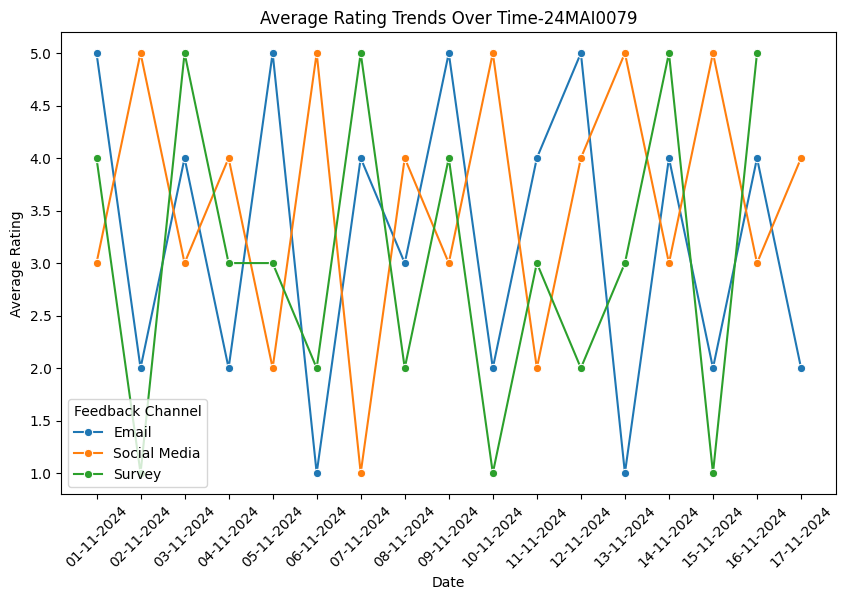

In [18]:
# Visualization of Average Rating Trends Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=trends, x='Date', y='Average_Rating', hue='FeedbackChannel', marker='o')
plt.title('Average Rating Trends Over Time-24MAI0079')
plt.ylabel('Average Rating')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Feedback Channel')
plt.show()

C:\Users\chakri\AppData\Local\Temp\ipykernel_2520\3535732806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_channel, x='FeedbackChannel', y='Rating', palette='pastel')


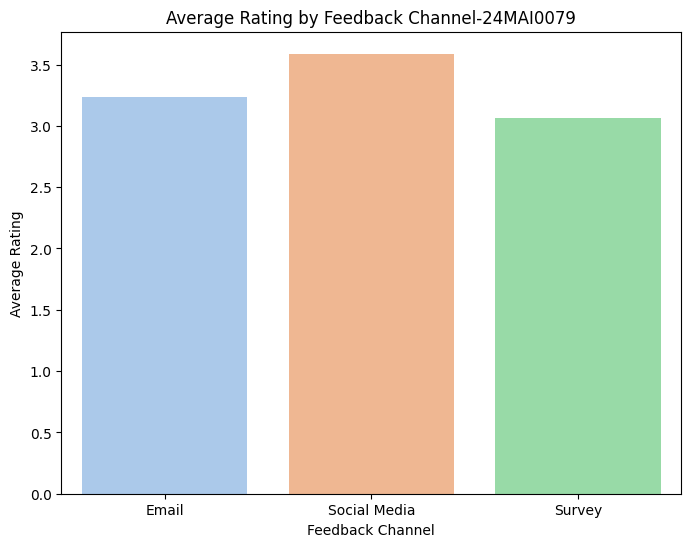

In [19]:
#Average Rating by Feedback Channel
average_rating_channel = df.groupby('FeedbackChannel')['Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=average_rating_channel, x='FeedbackChannel', y='Rating', palette='pastel')
plt.title('Average Rating by Feedback Channel-24MAI0079')
plt.ylabel('Average Rating')
plt.xlabel('Feedback Channel')
plt.show()

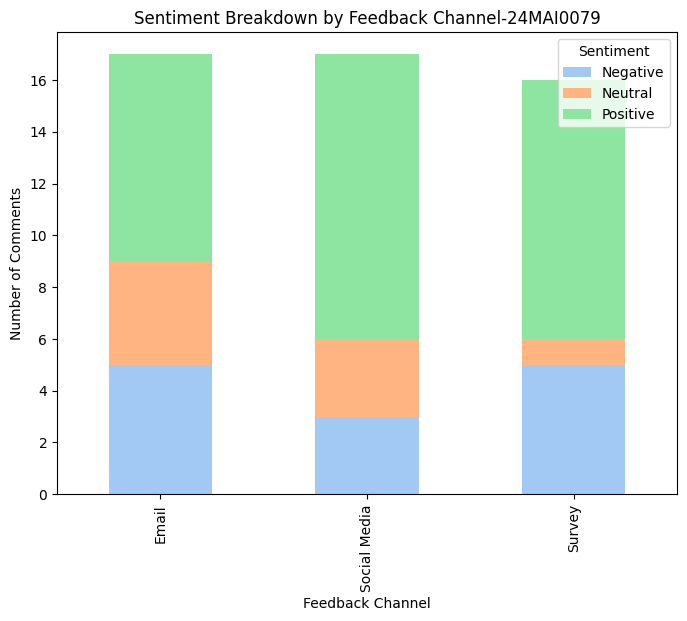

In [20]:
#Sentiment Breakdown by Feedback Channel
sentiment_by_channel = df.groupby(['FeedbackChannel', 'Sentiment']).size().unstack().fillna(0)
sentiment_by_channel.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('pastel'))
plt.title('Sentiment Breakdown by Feedback Channel-24MAI0079')
plt.ylabel('Number of Comments')
plt.xlabel('Feedback Channel')
plt.legend(title='Sentiment')
plt.show()


In [15]:
# Display results
print("Feedback Trends:\n", trends)
print("\nSentiment Counts:\n", sentiment_counts)

Feedback Trends:
           Date FeedbackChannel  Feedback_Count  Average_Rating
0   01-11-2024           Email               1             5.0
1   01-11-2024    Social Media               1             3.0
2   01-11-2024          Survey               1             4.0
3   02-11-2024           Email               1             2.0
4   02-11-2024    Social Media               1             5.0
5   02-11-2024          Survey               1             1.0
6   03-11-2024           Email               1             4.0
7   03-11-2024    Social Media               1             3.0
8   03-11-2024          Survey               1             5.0
9   04-11-2024           Email               1             2.0
10  04-11-2024    Social Media               1             4.0
11  04-11-2024          Survey               1             3.0
12  05-11-2024           Email               1             5.0
13  05-11-2024    Social Media               1             2.0
14  05-11-2024          Survey       

In [16]:

# Save to report (CSV)
trends.to_csv('feedback_trends_report.csv', index=False)